In [1]:
import numpy as np
import pandas as pd
import random as rd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def ACF_PACF(laggedData, lagCount):
    '''This function takes a DataFrame with the columns corresponding to 
       the lagged time series and calculates the ACF and PACF for each of the
       lags. laggedData is a DataFrame with the first column corresponding
       to the original time series data and subsequent columns corresponding to
       the lagged data'''
    
    ACF = []
    PACF = []

    for i in range(lagCount):
        ACF.append(np.corrcoef(laggedData[0],laggedData[i])[0][1])
        if i > 1:
            y = pd.DataFrame(laggedData[0])
            X = pd.DataFrame(laggedData.loc[:,1:i-1])
            lm = linear_model.LinearRegression()
            lm.fit(X,y)
            df1 = laggedData[0] 
            for j in range(lm.coef_.size):
                df1 = df1 - lm.coef_[0][j]*laggedData[j+1]

            PACF.append(np.corrcoef(df1,laggedData[i])[0][1])
        else:
            PACF.append(np.corrcoef(laggedData[0],laggedData[i])[0][1])
            
    df2 = pd.concat([pd.DataFrame(ACF),pd.DataFrame(PACF)], axis=1)

    return df2

In [4]:
def getACFPACF(time,timeSeries,lagCount):
    '''This function accepts a series corresponding to a time index and
       a series corresponding to a time series. It returns a plot of the
       original time series as well as the ACF and PACF data'''
    # Plot the timeSeries given
    pl = plt.plot(time, series)
    
    # Append the time series to itself to ease lagging
    tempSeries = np.append(timeSeries,timeSeries)
    
    # Create a dictionary where the values are the lagged series
    dic = {i:tempSeries[0+i:len(time)+i] for i in range(lagCount)}
    
    # Convert to a DataFrame
    laggedData = pd.DataFrame(dic)
    
    d = ACF_PACF(laggedData,lagCount)
    
    return pl,d

In [5]:
def createTimeSeriesData(seed, size, isARorMA):
    '''A function to create a random time series data according to
       to the inputs. isARorMA = 'AR' asks the function to create
       an Autoregressive time series and isARorMA = 'MA' asks 
       the function to create a Moving Average time series'''
    # Create the time array
    time = np.arange(0,size,1)

    # Create white noise array
    noise = np.random.normal(loc=0.0, scale=6.0, size=size)

    series = []
    
    if isARorMA == 'AR':
        # Create time series data
        series = np.array([4,2])
        for i in range(2,size):
            l = 0.5*series[i-1] + 0.3*series[i-2] + noise[i]
            series = np.append(series,l)
    
    return time,series

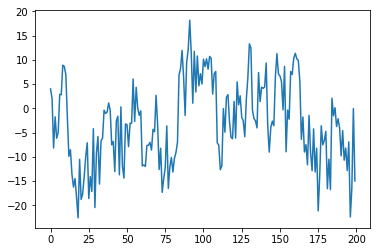

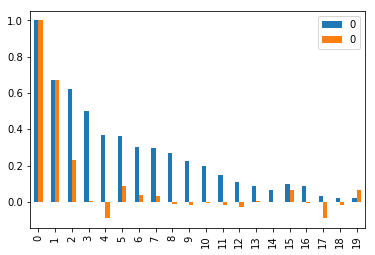

In [6]:
time,series = createTimeSeriesData(42, 200, 'AR')
pl,d = getACFPACF(time,series,20)
d.plot(kind='bar')

In [27]:
seed = 42

np.random.seed(seed)


# Create the time array
time = np.arange(0,100,1)

# Create white noise array
noise = np.random.normal(loc=0.0, scale=6.0, size=100)

# Create time series data
series = np.array([4,2])
for i in range(2,100):
    l = 0.5*series[i-1] + 0.3*series[i-2] + noise[i]
    series = np.append(series,l)

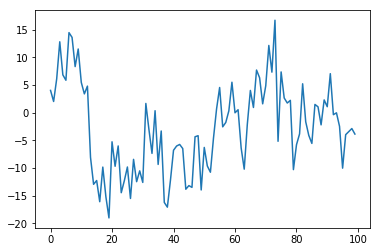

In [359]:
# Plot the time series data
plt.plot(time, series)

In [360]:
tempSeries = np.append(series,series)

In [361]:
# Get the ACF for 10 lags
ACF = []

for i in range(10):
    ACF.append(np.corrcoef(tempSeries[0:100],tempSeries[1+i:101+i])[0][1])

<Container object of 10 artists>

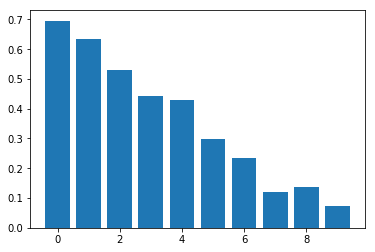

In [362]:
plt.bar(range(10), ACF)

In [363]:
# X = pd.DataFrame(tempSeries[0:100])

# for i in range(9):
#     X = pd.concat([X,pd.DataFrame(tempSeries[1+i:101+i])],axis=1)

In [364]:
dic = {i:tempSeries[0+i:100+i] for i in range(10)}
laggedData = pd.DataFrame(dic)

In [365]:
# Get the PACF for 10 lags
PACF = []

for i in range(10):
    if i > 1:
        y = pd.DataFrame(laggedData[0])
        X = pd.DataFrame(laggedData.loc[:,1:i-1])
        lm = linear_model.LinearRegression()
        lm.fit(X,y)
        df1 = tempSeries[0:100] 
        for j in range(lm.coef_.size):
            df1 = df1 - lm.coef_[0][j]*laggedData[j+1]
            
        PACF.append(np.corrcoef(df1,laggedData[i])[0][1])
    else:
        PACF.append(np.corrcoef(laggedData[0],laggedData[i])[0][1])

<Container object of 10 artists>

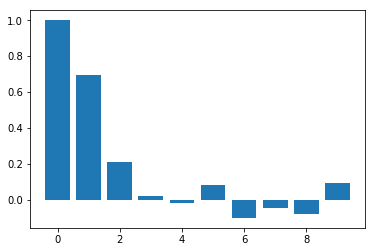

In [367]:
plt.bar(range(10),PACF)

In [368]:
d = ACF_PACF(laggedData)

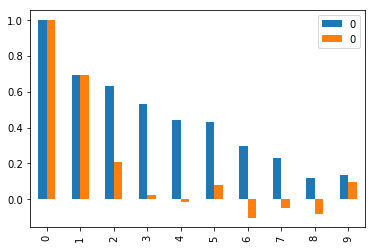

In [369]:
d.plot(kind='bar')